# PySDDR test run

In [8]:
# import the sddr module
from sddr import SDDR
import torch.nn as nn
from pandas import read_cdv

### The user defines the data, distribution and training parameters in the next cell

Alternatively these parameters can be defined in a config file (for example see config.yaml)

In [4]:
x_path = './example_data/gamlss/X.csv'
y_path = './example_data/gamlss/Y.csv'

data = read_csv(x_path, names=['x1','x2'],delimiter=';')
print(data)
target = read_csv(y_path, header=None)
output_dir = './outputs'

distribution  = 'Normal'

formulas = {'loc': '~1+spline(x1, bs="bs",df=9)+spline(x2, bs="bs",df=9)+d1(x1)+d2(x2)',
            'scale': '~1+spline(x1, bs="bs",df=9)+spline(x2, bs="bs",df=9)'
            }

deep_models_dict = {
'd1': {
    'model': nn.Sequential(nn.Linear(1,15)),
    'output_shape': 15},
'd2': {
    'model': nn.Sequential(nn.Linear(1,3),nn.ReLU(), nn.Linear(3,8)),
    'output_shape': 8}
}

train_parameters = {
'batch_size': 1000,
'epochs': 2500,
'regularization_params': {'loc':1, 'scale':1}
}

### The sddr instance is initialized with the parameters given by the user in the previous step

In [5]:
sddr = SDDR(data=data,
            target=target,
            output_dir=output_dir,
            distribution=distribution,
            formulas=formulas,
            deep_models_dict=deep_models_dict,
            train_parameters=train_parameters)

### The SDDR network is trained with the data defined above

In [6]:
sddr.train()

Begin training ...
Train Epoch: 0 	 Loss: 152.430405
Train Epoch: 100 	 Loss: 18.995136
Train Epoch: 200 	 Loss: 11.136900
Train Epoch: 300 	 Loss: 10.693645
Train Epoch: 400 	 Loss: 10.620160
Train Epoch: 500 	 Loss: 10.618581
Train Epoch: 600 	 Loss: 10.631886
Train Epoch: 700 	 Loss: 10.620583
Train Epoch: 800 	 Loss: 10.615362
Train Epoch: 900 	 Loss: 10.618888
Train Epoch: 1000 	 Loss: 10.621129
Train Epoch: 1100 	 Loss: 10.619688
Train Epoch: 1200 	 Loss: 10.618751
Train Epoch: 1300 	 Loss: 10.619212
Train Epoch: 1400 	 Loss: 10.619565
Train Epoch: 1500 	 Loss: 10.619159
Train Epoch: 1600 	 Loss: 10.618959
Train Epoch: 1700 	 Loss: 10.618957
Train Epoch: 1800 	 Loss: 10.618593
Train Epoch: 1900 	 Loss: 10.618494
Train Epoch: 2000 	 Loss: 10.618329
Train Epoch: 2100 	 Loss: 10.617764
Train Epoch: 2200 	 Loss: 10.617641
Train Epoch: 2300 	 Loss: 10.617745
Train Epoch: 2400 	 Loss: 10.617751


### Visualize the partial effects

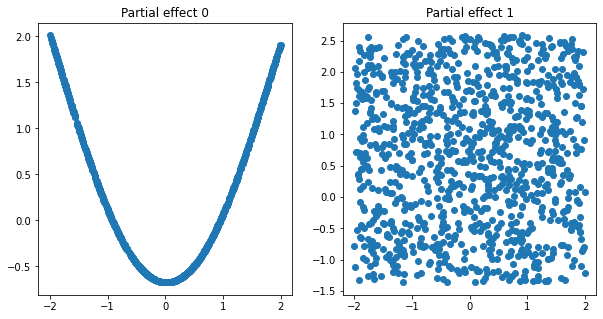

In [9]:
partial_effects = sddr.eval('loc')

In [ ]:
partial_effects = sddr.eval('scale')